In [13]:

import pandas as pd
import plotnine as p9
from palmerpenguins import load_penguins
from plotnine import *
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)

scattered_df=df[["appeared","number_of_users","title"]]


scattered_df.dropna()
scattered_df=scattered_df[scattered_df['appeared']>1800]
scattered_df


,appeared,number_of_users,title
0,1995,5550123,Java
1,1995,5962666,JavaScript
2,1972,3793768,C
3,1991,2818037,Python
4,1974,7179119,SQL
...,...,...,...
4298,1976,0,Very Tiny Language
4299,1997,0,wizml
4300,1955,0,Wolontis-Bell Interpreter
4301,1977,0,xl


In [14]:
main_10_types_df=scattered_df.groupby(["title"]).agg({"number_of_users":"sum"}).reset_index()
main_10_types_df = main_10_types_df.sort_values(by="number_of_users",ascending=False).head(5)["title"]
main_10_types_df

2823           SQL
1551    JavaScript
1318          HTML
1544          Java
478            C++
Name: title, dtype: object

In [21]:
import numpy as np

scattered_df['title'] = np.where(~scattered_df['title'].isin(main_10_types_df), 'other', scattered_df['title'])
scattered_df['title'].unique()
scattered_df


,appeared,number_of_users,title
0,1995,5550123,Java
1,1995,5962666,JavaScript
2,1972,3793768,other
3,1991,2818037,other
4,1974,7179119,SQL
...,...,...,...
4298,1976,0,other
4299,1997,0,other
4300,1955,0,other
4301,1977,0,other


In [23]:
scattered_df_gp = scattered_df.groupby(["appeared","title"]).agg({"number_of_users":"sum"}).reset_index()
scattered_df_gp

,appeared,title,number_of_users
0,1837,other,29235
1,1879,other,0
2,1883,other,565
3,1914,other,20
4,1941,other,1100
...,...,...,...
84,2019,other,202673
85,2020,other,28714
86,2021,other,16123
87,2022,other,35706


/home/pr/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/pr/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/pr/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/pr/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message 

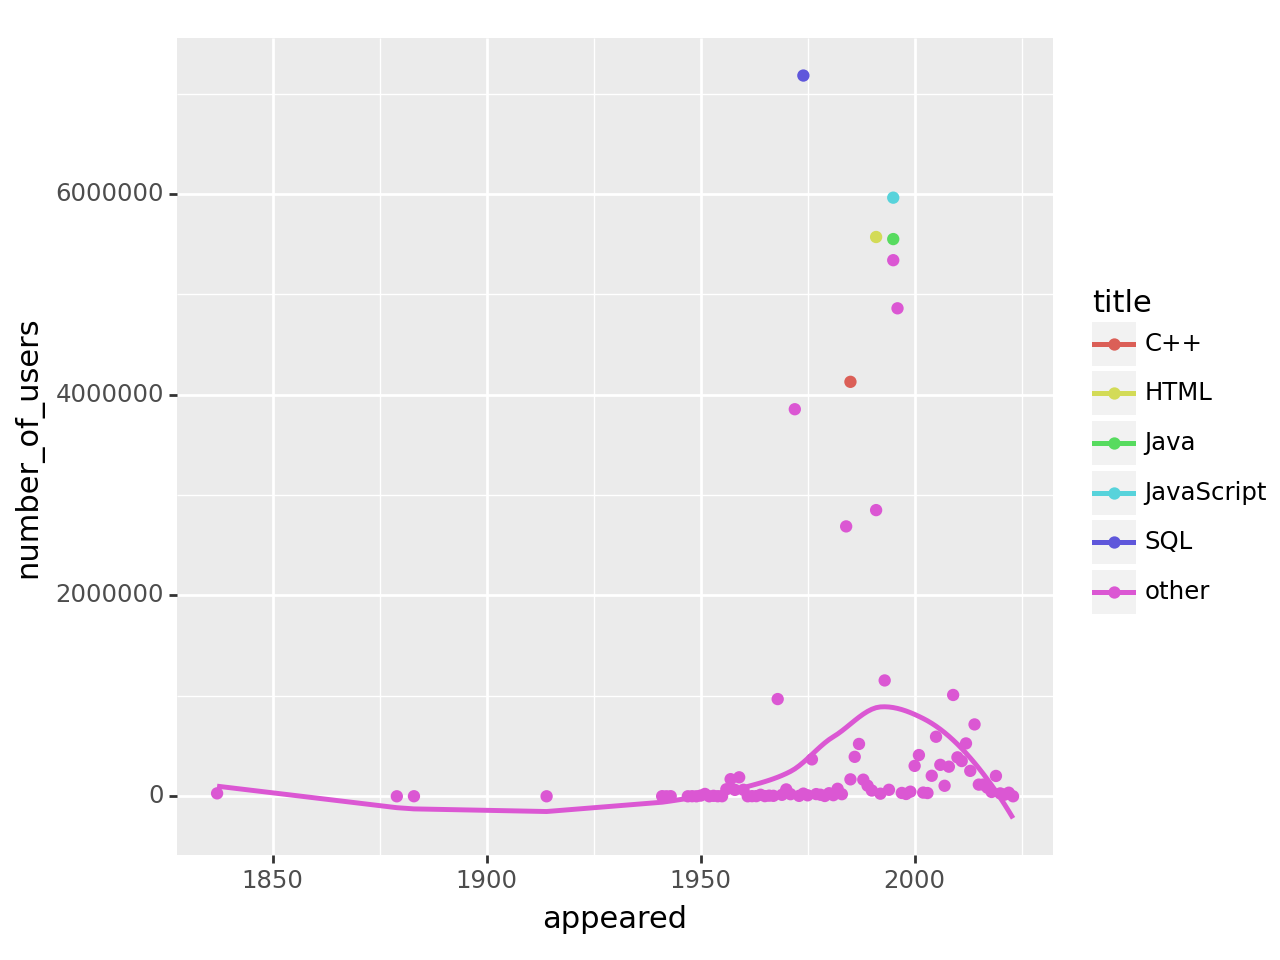

In [31]:
# Convert 'appeared' column to bins
#df['appeared_bin'] = pd.cut(df['appeared'], bins=range(1950, 2030, 5), right=False)

# Create an annotated heatmap using plotnine
annotated_heatmap = (
    ggplot(scattered_df_gp, aes(x='appeared', y='number_of_users', color='title')) +
    geom_point() +
    geom_smooth(method='auto', se=False) 
)

# Show plot
print(annotated_heatmap)
